In [1]:
import numpy as np
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from manifold_learning.utils import utils
from FastCCM import CCM
from sklearn.decomposition import PCA
from manifold_learning.data.data_loader import get_truncated_lorenz_rand

In [6]:
def generate_logistic_map_series_random_start(r, n, seed=None):
    """
    Generate a time series from the logistic map with a random starting point.

    Parameters:
    - r: float, the control parameter (0 < r ≤ 4).
    - n: int, the number of iterations.
    - seed: int or None, seed for the random number generator (optional).

    Returns:
    - numpy array of the time series values.
    """
    if not (0 < r <= 4):
        raise ValueError("Parameter 'r' must be in the range (0, 4].")
    if n <= 0:
        raise ValueError("Number of iterations 'n' must be a positive integer.")
    
    # Initialize the random seed
    if seed is not None:
        np.random.seed(seed)
    
    # Generate a random initial value in the range (0, 1)
    x0 = np.random.uniform(0, 1)
    
    # Initialize the time series
    time_series = np.zeros(n)
    time_series[0] = x0

    # Generate the series
    for i in range(1, n):
        time_series[i] = r * time_series[i - 1] * (1 - time_series[i - 1])

    return time_series

In [224]:
A = get_truncated_lorenz_rand(500,5000)[:,0]
A -= A.min()
A /= A.max()
B = generate_logistic_map_series_random_start(3.9, 5000)
B -= B.min()
B /= B.max()
C = generate_logistic_map_series_random_start(3.9, 5000)
C -= C.min()
C /= C.max()
D = get_truncated_lorenz_rand(500,5000)[:,0]
D -= D.min()
D /= D.max()

#X1 = A
X2 = A + 0.5 * B + 2 * D #(A, B, D)
X3 = 0.5 * A + C #(A, C)
X4 = B + 0.5 * C + D #(C, B, D)

#X4 = B

In [ ]:
plt.plot()

(0.0, 100.0)

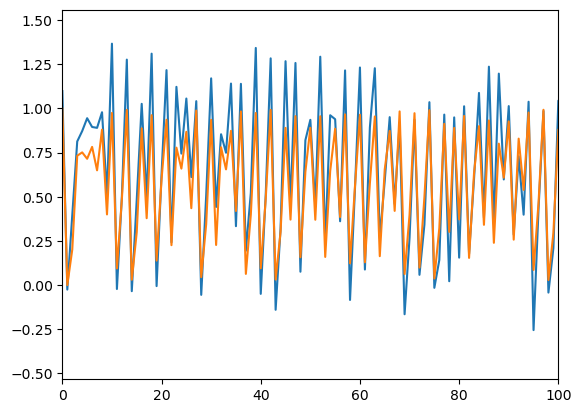

In [239]:
plt.plot(X3-0.5*X2+0.5*X4)
plt.plot(C)
plt.xlim(0,100)

In [ ]:
plt.plot(X3-0.5*X2+0.5*X4)
plt.plot(C)
plt.xlim(0,100)

In [215]:
data = np.transpose(utils.get_td_embedding_np(np.array([X1,X2,X3,X4]).T,3,1),(2,0,1))

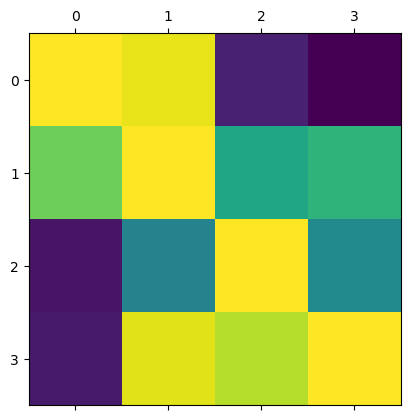

In [216]:
plt.matshow(CCM.PairwiseCCM().compute(data,data,1500,400,60,0,method="simplex",nbrs_num=15,)[-1])


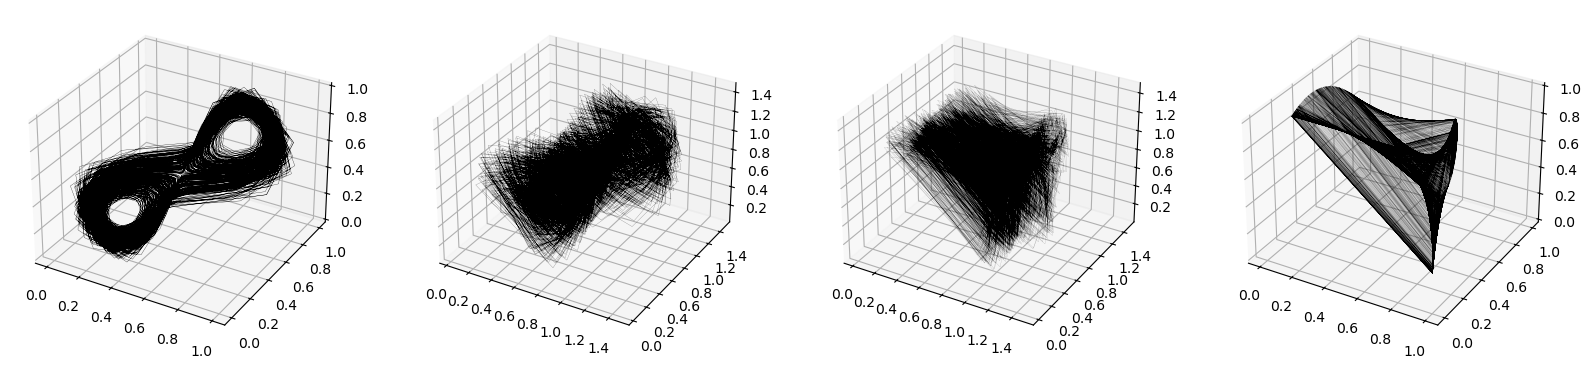

In [199]:

fig = plt.figure(figsize=(20, 6))

ax1 = fig.add_subplot(141, projection='3d')
ax1.plot(X1[:-2],X1[1:-1],X1[2:], lw=0.2,color="black")

ax2 = fig.add_subplot(142, projection='3d')
ax2.plot(X2[:-2],X2[1:-1],X2[2:], lw=0.1,color="black")

ax2 = fig.add_subplot(143, projection='3d')
ax2.plot(X3[:-2],X3[1:-1],X3[2:], lw=0.05,color="black")

ax2 = fig.add_subplot(144, projection='3d')
ax2.plot(X4[:-2],X4[1:-1],X4[2:], lw=0.02,color="black")
plt.show()

In [2]:
t = np.linspace(0,1000,10000)
A = np.sin(t)
B = np.cos(t)
C = np.sin(t*1.327)
D = np.cos(t*1.327)

In [3]:
import plotly.express as px

fig = px.scatter_3d(x=A, y=B, z=C, color=D, height=700)

fig.show()


In [4]:
X_1 = get_truncated_lorenz_rand(800,80000)[:,0]
X_2 = get_truncated_lorenz_rand(800,80000)[:,0]
X_3 = get_truncated_lorenz_rand(800,80000)[:,0]
X_4 = get_truncated_lorenz_rand(800,80000)[:,0]
Y = X_1 + X_2 + X_3 

x_1_emb = utils.get_td_embedding_np(X_1[:,None],4,7,return_pred=False)[:,:,0]
x_2_emb = utils.get_td_embedding_np(X_2[:,None],4,7,return_pred=False)[:,:,0]
y_emb = utils.get_td_embedding_np(Y[:,None],4,7,return_pred=False)[:,:,0]

array([-11.29512211, -10.71041011, -10.10056404, ...,  -5.00247991,
        -4.58948382,  -4.21294901])

In [63]:
XX = np.concatenate([get_truncated_lorenz_rand(800,80000),  get_truncated_lorenz_rand(800,80000)],axis=1)

In [65]:
pca = PCA()
pca.fit_transform(XX)

array([[  5.68409587,  -0.27530077,  -7.81694194, -14.54330243,
         -0.6374499 ,  -0.30634201],
       [  6.08885893,  -0.22622079,  -7.69585564, -14.88721737,
         -0.76183073,  -0.28283716],
       [  6.53312871,  -0.17314881,  -7.58081075, -15.20681021,
         -0.89177813,  -0.26599431],
       ...,
       [ -2.70654129,   2.2881545 ,   3.81519322,  -7.48796553,
          1.09544826,   0.29159326],
       [ -2.88916922,   2.40216718,   3.70070638,  -8.10225751,
          1.04523633,   0.20597362],
       [ -3.08123838,   2.52766712,   3.5868412 ,  -8.69591642,
          1.00922938,   0.12566351]])

In [52]:
res = []
for e in range(2,50,2):
    for tau in range(1,50,2):
        y_emb = utils.get_td_embedding_np(Y[:,None],e,tau,return_pred=False)[:,:,0]
        temp = []
        for exp in range(10):
            temp += [utils.calculate_correlation_dimension(y_emb[np.random.randint(0,y_emb.shape[0],1000)],device="cuda")]
        res += [np.mean(temp)]
res = (np.array(res).reshape(24,25))

In [9]:
res_ = []
for j in range(1,16):
    res_ += [utils.calculate_correlation_dimension(
        np.concatenate([get_truncated_lorenz_rand(800,40000) for i in range(j)],axis=1)[np.random.randint(0,40000,1000)],device="cuda")]

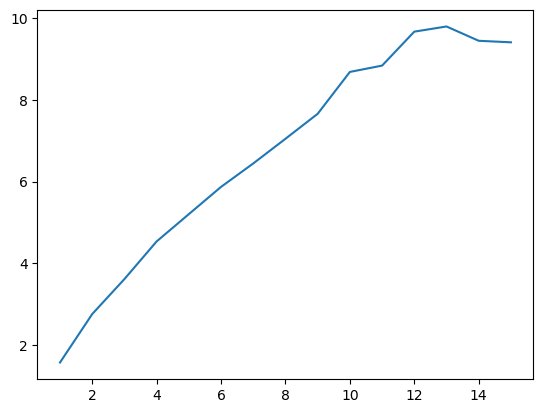

In [37]:
plt.plot(np.arange(1,16), res_)

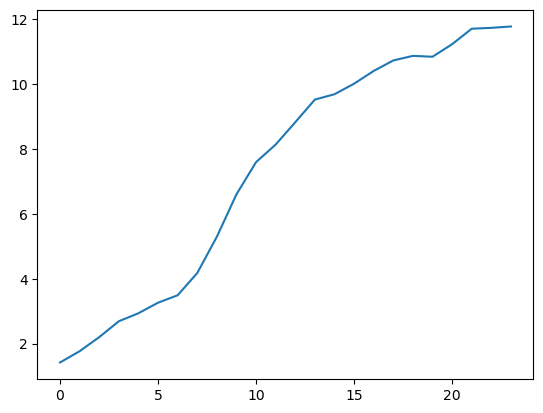

In [53]:
plt.plot(np.diag(res))

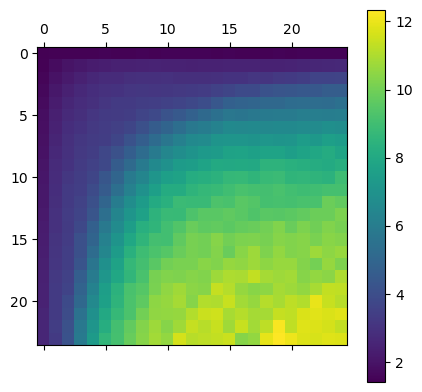

In [54]:
plt.matshow(res)
plt.colorbar()

In [25]:
t = np.linspace(0,500,1000)
x_1 = np.sin(t)
x_2 = np.sin(1.42 * t + 1)

y = x_1 + x_2

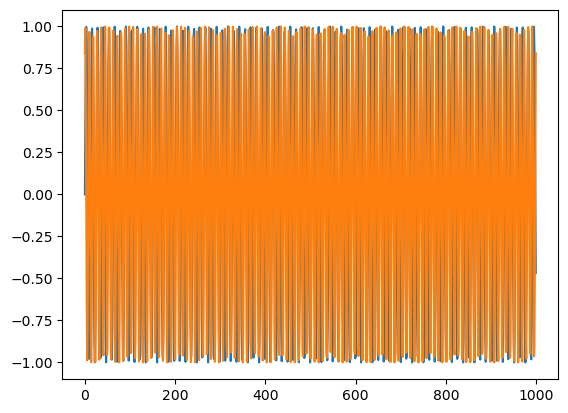

In [45]:
plt.plot(x_1)
plt.plot(x_2)

In [27]:
x_1_emb = utils.get_td_embedding_np(x_1[:,None],2,10,return_pred=False)[:,:,0]
x_2_emb = utils.get_td_embedding_np(x_2[:,None],2,10,return_pred=False)[:,:,0]
y_emb = utils.get_td_embedding_np(y[:,None],2,10,return_pred=False)[:,:,0]

In [76]:

CCM.PairwiseCCM().compute(y_emb[None],x_1_emb[None],1500,400,60,0,method="simplex",nbrs_num = 20).mean()

0.43563178

In [83]:


CCM.PairwiseCCM().compute(x_1_emb[None],y_emb[None],1500,400,60,0,method="simplex",nbrs_num = 20).mean()

0.47030395

In [65]:


CCM.PairwiseCCM().compute(x_2_emb[None],x_1_emb[None],1500,400,60,0,method="simplex",nbrs_num = 20).mean()

-0.017481336

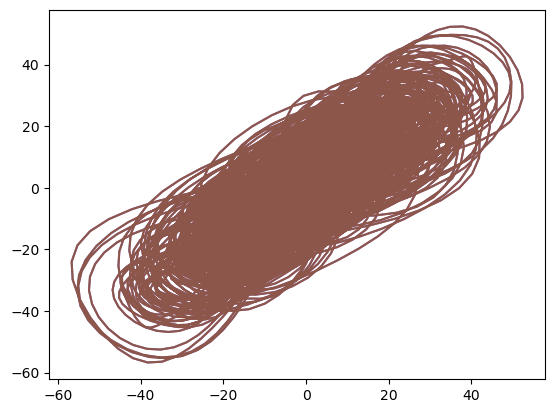

In [75]:
plt.plot(*x_1_emb.T)
plt.plot(*x_2_emb.T)
plt.plot(*y_emb.T)

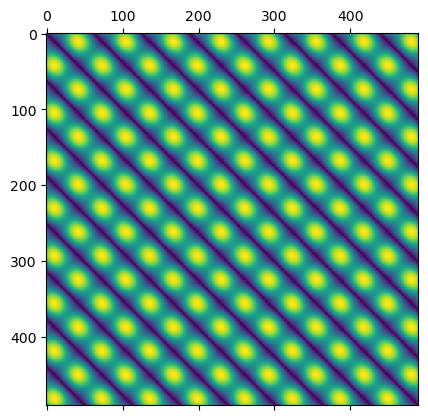

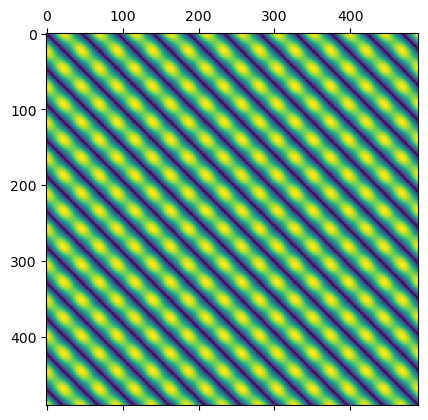

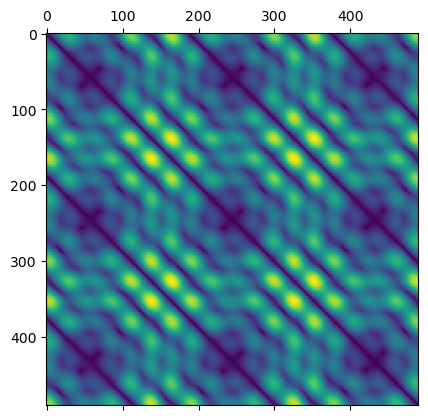

In [53]:
pd_x_1 = pairwise_distances(x_1_emb)
pd_x_2 = pairwise_distances(x_2_emb)
pd_y = pairwise_distances(y_emb)

plt.matshow(pd_x_1)
plt.matshow(pd_x_2)
plt.matshow(pd_y)

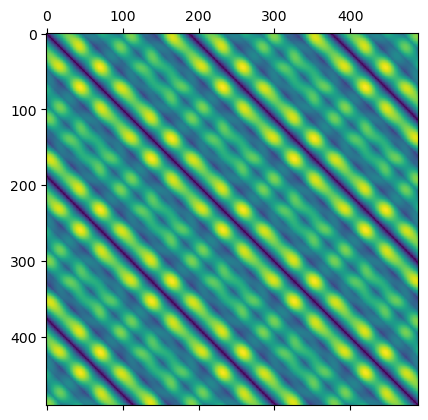

In [61]:
pd_ = np.sqrt(pd_x_1**2+pd_x_2**2 + 2*pd_x_1*pd_x_2)

plt.matshow(pd_)

In [75]:
angle = np.arccos((pd_y**2 - pd_x_1**2 - pd_x_2**2)/(2*pd_x_1*pd_x_2))

/tmp/ipykernel_153122/2136748876.py:1: RuntimeWarning: invalid value encountered in divide
  angle = np.arccos((pd_y**2 - pd_x_1**2 - pd_x_2**2)/(2*pd_x_1*pd_x_2))


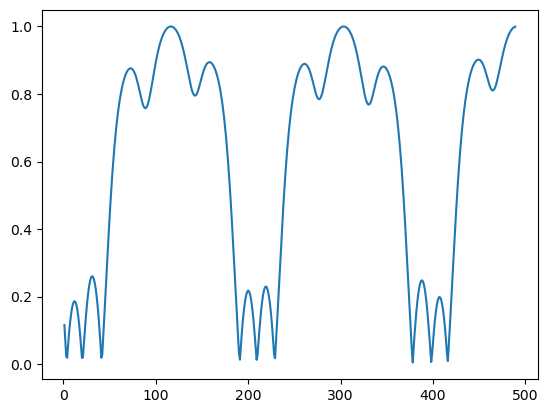

In [81]:
plt.plot(np.abs(np.cos(angle[0])))

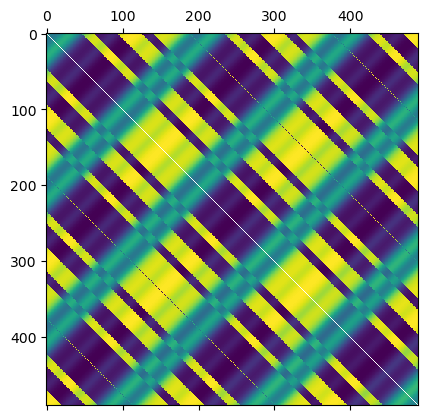

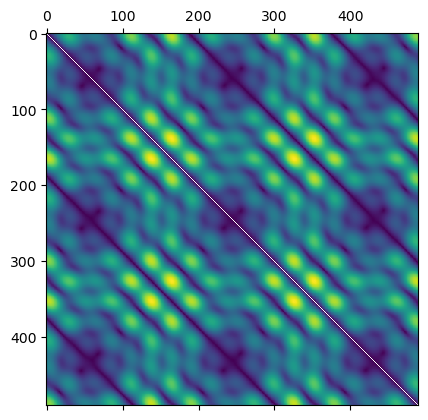

In [78]:
plt.matshow(np.cos(angle))

plt.matshow(np.sqrt(pd_x_1**2+pd_x_2**2 + 2*np.cos(angle)*pd_x_1*pd_x_2))